# 1. Importe la base de datos de la tarea de la semana 1 (Dummy Data.csv) en Jupyter Notebook.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv("DummyData.csv")

df.dropna(inplace=True )

# 2. Escoja su variable objetivo y las variables independientes considerando un enfoque de regresión lineal.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [40]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns
labelencoder = LabelEncoder()
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)
X = df[df.columns.difference(['Sales'])]
y = df.Sales

# 3. Realice un train/test split, separando un 90% de los datos para la submuestra de entrenamiento y 10% para la submuestra de prueba. 

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =123)

In [42]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4091, 4)  <class 'pandas.core.frame.DataFrame'>
(4091,) 	  <class 'pandas.core.series.Series'>
(455, 4)  <class 'pandas.core.frame.DataFrame'>
(455,) 	  <class 'pandas.core.series.Series'>


# 4.Entrene al modelo de regresión lineal por sklearn. 

In [43]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train ,)

LinearRegression()

In [48]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

# 5. Evalúe su modelo. ¿Es este aceptable?, para ello escoja las métricas correspondientes. 

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [49]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

8.65310485373915
9.053409318682089


In [50]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

2.941616027584013
3.008888385879757


In [51]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

2.3584650397450866
2.420156808073672


In [53]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.9990026991367676
El R^2 del subconjunto de prueba es: 0.9989196736539484


# 6. Compare sus predicciones con los datos reales mediante un gráfico. 

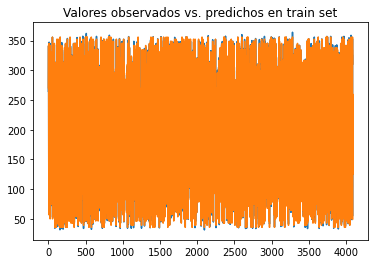

In [54]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

# 7. Identifique a las dos variables con  mayor poder explicativo en el modelo ¿Cómo las identificó?

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [62]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [63]:
importancia = modelo_regresion_std.coef_

In [64]:
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -0.02767
Variable explicativa No. 1, Score: -0.00353
Variable explicativa No. 2, Score: -0.00187
Variable explicativa No. 3, Score: 93.10500


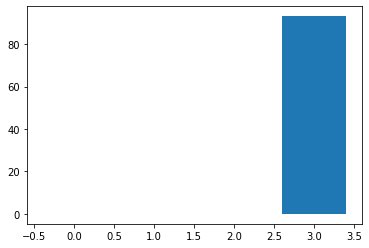

In [65]:
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

#1. Importe la base de datos de la tarea de la semana 2 (bank-additional-full)

In [68]:
df=pd.read_csv("bank-additional-full.csv",delimiter= ";" )

df.dropna(inplace=True )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2.Escoja su variable objetivo y las variables independientes considerando un enfoque de regresión logística. 

In [71]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns
labelencoder = LabelEncoder()
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)
X_logit = df[df.columns.difference(['y'])]
y_logit = df.y

# 3.Realice un train/test split, separando un 90% de los datos para la submuestra de entrenamiento y 10% para la submuestra de prueba. 

In [72]:
X_train_logit , X_test_logit , y_train_logit , y_test_logit = train_test_split(X_logit , y_logit , test_size = 0.10,random_state =123)

In [73]:
print(X_train_logit.shape,"",type(X_train_logit))
print(X_train_logit.shape,"\t ",type(y_train_logit))
print(X_test_logit.shape,"",type(X_test_logit))
print(X_test_logit.shape,"\t ",type(y_test_logit))

(37069, 20)  <class 'pandas.core.frame.DataFrame'>
(37069, 20) 	  <class 'pandas.core.series.Series'>
(4119, 20)  <class 'pandas.core.frame.DataFrame'>
(4119, 20) 	  <class 'pandas.core.series.Series'>


# 4. Entrene al modelo de regresión logística por sklearn. 

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_logit, y_train_logit)
predicciones_train_logit = modelo_logistico.predict(X_train_logit)
predicciones_test_logit  = modelo_logistico.predict(X_test_logit)

# 5. Evalúe su modelo ¿Es este aceptable? , por ello escoja las métricas correspondientes.

In [76]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
cm = metrics.confusion_matrix(y_test_logit, predicciones_test_logit)
print(cm)

[[3586   85]
 [ 271  177]]


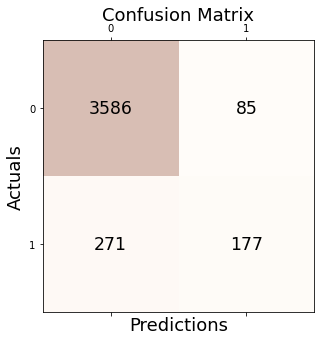

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# 6. Identifique a las dos variables con mayor poder explicativo en el modelo ¿Cómo las identifico? 

In [79]:
sc_logit = StandardScaler()

In [81]:
X_train_std_logit = sc_logit.fit_transform(X_train_logit)
X_test_std_logit = sc_logit.transform(X_test_logit)

In [82]:
modelo_logistico_std = LogisticRegression()
modelo_logistico_std.fit(X_train_std_logit, y_train_logit)

LogisticRegression()

In [83]:
predicciones_train_logit_std = modelo_logistico_std.predict(X_train_std_logit)
predicciones_test_logit_std  = modelo_logistico_std.predict(X_test_std_logit)

In [84]:
importancia_logit = modelo_logistico_std.coef_[0]

In [85]:
for i,v in enumerate(importancia_logit):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 0.05797
Variable explicativa No. 1, Score: -0.08466
Variable explicativa No. 2, Score: 0.11919
Variable explicativa No. 3, Score: 0.48147
Variable explicativa No. 4, Score: -0.32747
Variable explicativa No. 5, Score: 0.07930
Variable explicativa No. 6, Score: -0.15473
Variable explicativa No. 7, Score: 1.17450
Variable explicativa No. 8, Score: 0.11087
Variable explicativa No. 9, Score: -1.48018
Variable explicativa No. 10, Score: 0.97317
Variable explicativa No. 11, Score: -0.00121
Variable explicativa No. 12, Score: 0.03639
Variable explicativa No. 13, Score: -0.02025
Variable explicativa No. 14, Score: 0.07601
Variable explicativa No. 15, Score: -0.24897
Variable explicativa No. 16, Score: -0.81194
Variable explicativa No. 17, Score: -0.18870
Variable explicativa No. 18, Score: 0.16530
Variable explicativa No. 19, Score: -0.02531


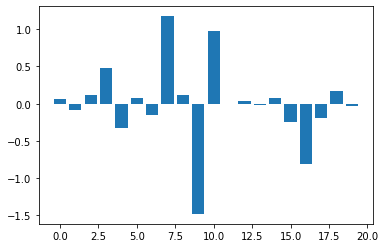

In [86]:
plt.bar([x for x in range(len(importancia_logit))], importancia_logit)
plt.show()